In [2]:
import os
import pathlib
import pickle
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import SVC
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

In [3]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0 # flaten the img to make computer deal with
    return img

In [4]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
           
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column - dog or a cat
    processed['class'] = folder.parts[-1]
    
    return processed

In [6]:
train_cat = process_folder(folder=pathlib.Path.cwd().joinpath(r'D:\study\grade 3\1st term\Selected 1\project\imgsvm\pets\PetImages\cat'))
train_dog = process_folder(folder=pathlib.Path.cwd().joinpath(r'D:\study\grade 3\1st term\Selected 1\project\imgsvm\pets\PetImages\dog'))
df = pd.concat([train_cat, train_dog], axis=0)

with open('train_set.pkl','wb') as f:
    pickle.dump(df,f)

In [7]:
df.info

<bound method DataFrame.info of              0         1         2         3         4         5         6  \
0     0.662745  0.678431  0.698039  0.713725  0.725490  0.737255  0.749020   
1     0.164706  0.164706  0.200000  0.168627  0.180392  0.160784  0.168627   
2     0.133333  0.125490  0.172549  0.176471  0.180392  0.211765  0.223529   
3     0.870588  0.874510  0.870588  0.886275  0.894118  0.882353  0.894118   
4     0.435294  0.458824  0.494118  0.345098  0.274510  0.415686  0.533333   
...        ...       ...       ...       ...       ...       ...       ...   
6996  0.274510  0.282353  0.286275  0.286275  0.286275  0.286275  0.282353   
6997  0.149020  0.145098  0.156863  0.145098  0.117647  0.164706  0.184314   
6998  0.596078  0.666667  0.603922  0.556863  0.600000  0.631373  0.580392   
6999  0.305882  0.309804  0.313725  0.317647  0.325490  0.329412  0.333333   
7000  0.537255  0.556863  0.592157  0.596078  0.549020  0.674510  0.666667   

             7         8       

In [8]:
df=shuffle(df).reset_index(drop=True)
#valid_set=shuffle(valid_set).reset_index(drop=True)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.949020,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,...,0.462745,0.423529,0.400000,0.411765,0.364706,0.360784,0.321569,0.258824,0.192157,cat
1,0.419608,0.419608,0.415686,0.435294,0.427451,0.435294,0.431373,0.447059,0.450980,0.439216,...,0.525490,0.521569,0.525490,0.521569,0.513725,0.521569,0.513725,0.513725,0.525490,cat
2,0.086275,0.090196,0.105882,0.160784,0.176471,0.152941,0.113725,0.086275,0.090196,0.086275,...,0.305882,0.149020,0.137255,0.129412,0.125490,0.117647,0.141176,0.270588,0.317647,cat
3,0.219608,0.223529,0.223529,0.235294,0.231373,0.235294,0.231373,0.239216,0.227451,0.243137,...,0.674510,0.482353,0.368627,0.384314,0.403922,0.431373,0.364706,0.384314,0.396078,dog
4,0.372549,0.639216,0.647059,0.592157,0.427451,0.392157,0.427451,0.396078,0.345098,0.650980,...,0.705882,0.772549,0.650980,0.686275,0.756863,0.509804,0.635294,0.498039,0.639216,dog


In [11]:
X = df.loc[:, df.columns!='class']
Y = df['class']

In [12]:
Y

0        cat
1        cat
2        cat
3        dog
4        dog
        ... 
13996    cat
13997    dog
13998    dog
13999    dog
14000    dog
Name: class, Length: 14001, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.15, shuffle=True,random_state=42)

In [14]:
X_train, X_val, y_train, y_val = train_test_split( X, Y, test_size=0.15, shuffle=True,random_state=42)

In [15]:
y_train

10767    cat
12118    dog
3728     cat
1166     dog
8962     cat
        ... 
5191     dog
13418    cat
5390     cat
860      dog
7270     dog
Name: class, Length: 11900, dtype: object

In [ ]:
# from sklearn.svm import SVC
# svm = SVC(C=100, gamma='auto')
# svm.fit(X_train , y_train)
# y_pred=svm.predict(X_test)

In [16]:
from sklearn.svm import SVC
svm = SVC(C=100, gamma='auto')
svm.fit(X_train , y_train)
y_pred=svm.predict(X_val)

In [17]:
%%time
from sklearn.metrics import accuracy_score
accuracy_score(y_val , y_pred)

Wall time: 191 ms


0.6149452641599239

In [18]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred)
cm

array([[635, 398],
       [411, 657]], dtype=int64)

Wall time: 73.9 ms


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

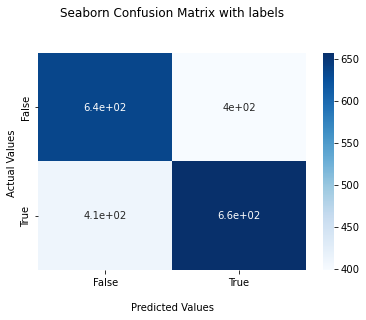

In [20]:
%%time
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [ ]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(svm, X, Y, cv=30,return_times=True)
plt.plot(train_sizes,np.mean(train_scores,axis=1))

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fig=plot_roc_curve(svm,X_val,y_val)
plt.title("ROC CURVE")
plt.show()

In [ ]:
%%time
y_pred_test=svm.predict(X_test)

In [ ]:
%%time
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_test)